## Create Organized CSV of the results
In this section I will create organied csv of the results.
- Organized by the day shooting of each of the flower
- Version without the shooting from days 2 and 8 (results werent good)

In [6]:
import pandas as pd

flowers_df = pd.read_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/experiment_2/results/faster_rcnn/csv_results/collected_class_distribution_per_folder.csv')
images_df = pd.read_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/experiment_2/results/faster_rcnn/csv_results/collected_class_distribution_per_image.csv')

In [7]:
flowers_df.head()

day    location  number  clear_count  cloudy_count  \
0  day_1_2024_12_05  greenhouse      15          147          1575   
1  day_1_2024_12_05  greenhouse      14          271          1395   
2  day_1_2024_12_05  greenhouse      13           86          2315   
3  day_1_2024_12_05  greenhouse      12          165          1797   
4  day_1_2024_12_05  greenhouse      11          320          1129   

   amber_count  clear_normalized  cloudy_normalized  amber_normalized  
0           18            0.0845             0.9052            0.0103  
1           12            0.1615             0.8313            0.0072  
2           43            0.0352             0.9472            0.0176  
3            9            0.0837             0.9117            0.0046  
4           10            0.2193             0.7738            0.0069

In [8]:
images_df.head()

day    location  number     image  clear_count  cloudy_count  \
0  day_1_2024_12_05  greenhouse      15  IMG_0577            0            28   
1  day_1_2024_12_05  greenhouse      15  IMG_0578            0           113   
2  day_1_2024_12_05  greenhouse      15  IMG_0579            0             2   
3  day_1_2024_12_05  greenhouse      15  IMG_0580            0            24   
4  day_1_2024_12_05  greenhouse      15  IMG_0581            0            62   

   amber_count  clear_normalized  cloudy_normalized  amber_normalized  
0            0               0.0             1.0000            0.0000  
1            2               0.0             0.9826            0.0174  
2            0               0.0             1.0000            0.0000  
3            0               0.0             1.0000            0.0000  
4            0               0.0             1.0000            0.0000

### Plants types for each of the planets ids

In [ ]:
plants_type_csv = "/home/etaylor/code_projects/thesis/src/data_analysis/assessing_cannabis_maturity/experiment_2/plants_types_experiment2.csv"

df_plants_type = pd.read_csv(plants_type_csv)
df_plants_type   

date   id HPLC_number repeat_number
0    5.12.24    1        54-1         616-1
1    5.12.24    2        54-2         616-2
2    5.12.24    3        54-3      805-12-3
3    5.12.24    4        54-4         616-5
4    5.12.24    5        54-5      1416-3-6
..       ...  ...         ...           ...
145  16.1.25  146      54-146      1416-3-3
146  16.1.25  147      54-147         616-4
147  16.1.25  148      54-148      805-12-4
148  16.1.25  149      54-149         616-6
149  16.1.25  150      54-150      805-12-6

[150 rows x 4 columns]

In [ ]:
flowers_df = flowers_df.merge(
    df_plants_type[['id', 'repeat_number']].rename(columns={'repeat_number': 'plant_type'}), 
    left_on='flower_id', 
    right_on='id', 
    how='left'
).drop(columns=['id'])


In [ ]:
flowers_df.head()

day    location  number  clear_count  cloudy_count  \
0  day_1_2024_12_05  greenhouse      15          209          1501   
1  day_1_2024_12_05  greenhouse      14          305          1333   
2  day_1_2024_12_05  greenhouse      13          141          2257   
3  day_1_2024_12_05  greenhouse      12          273          1665   
4  day_1_2024_12_05  greenhouse      11          380          1034   

   amber_count  clear_normalized  cloudy_normalized  amber_normalized  \
0           16            0.1211             0.8696            0.0093   
1            7            0.1854             0.8103            0.0043   
2           34            0.0580             0.9280            0.0140   
3            8            0.1403             0.8556            0.0041   
4           15            0.2659             0.7236            0.0105   

   day_number  flower_id plant_type  
0           1         15      616-8  
1           1         14   1416-3-7  
2           1         13   805-12-6  
3           1         12      616-6  
4           1         11   1416-3-5

In [9]:
df = flowers_df

# Extract the day number and reassign flower indices correctly
df['day_number'] = df['day'].apply(lambda x: int(x.split('_')[1]))
df['flower_id'] = (df['number'] - 1) % 15 + 1

# Sort the data by flower_id and then by day_number
df_sorted = df.sort_values(by=['flower_id', 'day_number'])

# Process the images DataFrame to calculate the number of images per flower per day for greenhouse
images_df['day_number'] = images_df['day'].apply(lambda x: int(x.split('_')[1]))
images_df['flower_id'] = (images_df['number'] - 1) % 15 + 1

greenhouse_images_df = images_df[images_df['location'] == 'greenhouse']
lab_images_df = images_df[images_df['location'] == 'lab']

num_images_per_flower_day_greenhouse = greenhouse_images_df.groupby(['day_number', 'flower_id']).size().reset_index(name='num_images')
num_images_per_flower_day_lab = lab_images_df.groupby(['day_number', 'flower_id']).size().reset_index(name='num_images')



In [10]:
images_df.head()

day    location  number     image  clear_count  cloudy_count  \
0  day_1_2024_12_05  greenhouse      15  IMG_0577            0            28   
1  day_1_2024_12_05  greenhouse      15  IMG_0578            0           113   
2  day_1_2024_12_05  greenhouse      15  IMG_0579            0             2   
3  day_1_2024_12_05  greenhouse      15  IMG_0580            0            24   
4  day_1_2024_12_05  greenhouse      15  IMG_0581            0            62   

   amber_count  clear_normalized  cloudy_normalized  amber_normalized  \
0            0               0.0             1.0000            0.0000   
1            2               0.0             0.9826            0.0174   
2            0               0.0             1.0000            0.0000   
3            0               0.0             1.0000            0.0000   
4            0               0.0             1.0000            0.0000   

   day_number  flower_id  
0           1         15  
1           1         15  
2           1         15  
3           1         15  
4           1         15

In [11]:
# Sort the data by location, flower_id, and day_number
df_sorted_by_location = df.sort_values(by=['location', 'flower_id', 'day_number'])

df_greenhouse = df_sorted_by_location[df_sorted_by_location['location'] == 'greenhouse']
df_lab = df_sorted_by_location[df_sorted_by_location['location'] == 'lab']

# Merge the number of images with the greenhouse and lab data
df_greenhouse = df_greenhouse.merge(num_images_per_flower_day_greenhouse, on=['day_number', 'flower_id'], how='left')
df_lab = df_lab.merge(num_images_per_flower_day_lab, on=['day_number', 'flower_id'], how='left')


In [12]:
df_greenhouse.head()

day    location  number  clear_count  cloudy_count  \
0  day_1_2024_12_05  greenhouse       1           47           904   
1  day_3_2024_12_12  greenhouse      31         2207          1339   
2  day_4_2024_12_17  greenhouse      46          768          2441   
3  day_5_2024_12_24  greenhouse      61          269           912   
4  day_6_2024_12_30  greenhouse      76           87           591   

   amber_count  clear_normalized  cloudy_normalized  amber_normalized  \
0            6            0.0491             0.9446            0.0063   
1           16            0.6196             0.3759            0.0045   
2          276            0.2204             0.7004            0.0792   
3           69            0.2152             0.7296            0.0552   
4           44            0.1205             0.8186            0.0609   

   day_number  flower_id  num_images  
0           1          1          17  
1           3          1          27  
2           4          1          24  
3           5          1          28  
4           6          1          26

In [13]:
df_lab.head()

day location  number  clear_count  cloudy_count  amber_count  \
0  day_1_2024_12_05      lab       1          227          1088           17   
1  day_2_2024_12_09      lab      16          276           486           15   
2  day_3_2024_12_12      lab      31         1528           165            1   
3  day_4_2024_12_17      lab      46         1478          2284          144   
4  day_5_2024_12_24      lab      61          575          1199           44   

   clear_normalized  cloudy_normalized  amber_normalized  day_number  \
0            0.1704             0.8168            0.0128           1   
1            0.3552             0.6255            0.0193           2   
2            0.9020             0.0974            0.0006           3   
3            0.3784             0.5847            0.0369           4   
4            0.3163             0.6595            0.0242           5   

   flower_id  num_images  
0          1          20  
1          1          12  
2          1          23  
3          1          22  
4          1          24

In [18]:
# save dfs to csv
df_sorted.to_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/experiment_2/results/faster_rcnn/csv_results/sorted/class_distribution_per_folder_sorted.csv', index=False)
df_lab.to_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/experiment_2/results/faster_rcnn/csv_results/sorted/class_distribution_per_folder_sorted_lab.csv', index=False)
df_greenhouse.to_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/experiment_2/results/faster_rcnn/csv_results/sorted/class_distribution_per_folder_sorted_greenhouse.csv', index=False)

In [31]:
df_sorted_excluded = df_sorted[~df_sorted['day_number'].isin([2, 8])]
df_greenhouse_excluded = df_greenhouse[~df_greenhouse['day_number'].isin([2, 8])]
df_lab_excluded = df_lab[~df_lab['day_number'].isin([2, 8])]

In [18]:
df_greenhouse_excluded.head()

day    location  number  clear_count  cloudy_count  \
0  day_1_2024_05_30  greenhouse       1          222           489   
2  day_3_2024_06_06  greenhouse      61          652          1251   
3  day_4_2024_06_10  greenhouse      91          443          1844   
4  day_5_2024_06_13  greenhouse     121          117          1056   
5  day_6_2024_06_17  greenhouse     151          195          1156   

   amber_count  clear_normalized  cloudy_normalized  amber_normalized  \
0           26            0.3012             0.6635            0.0353   
2           49            0.3340             0.6409            0.0251   
3           48            0.1897             0.7897            0.0206   
4           75            0.0938             0.8462            0.0601   
5           46            0.1396             0.8275            0.0329   

   day_number  flower_id  num_images  
0           1          1          10  
2           3          1          17  
3           4          1          15  
4           5          1          16  
5           6          1          15

In [ ]:
# save csv
df_sorted_excluded.to_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/results/csv_results/collected_class_distribution_per_folder_sorted.csv', index=False)
df_greenhouse_excluded.to_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/results/csv_results/collected_class_distribution_per_folder_greenhouse_sorted.csv', index=False)
df_lab_excluded.to_csv('/sise/shanigu-group/etaylor/assessing_cannabis_exp/results/csv_results/collected_class_distribution_per_folder_lab_sorted.csv', index=False)

## Analysis of the Results
In this section I will analysis the results received.
- I want to check how many flowers are change their trichome dist from clear to cloudy and then amber.
- How many did not changed their dist accordingly
- How many In the end have high percentage of amber and not cloudy or clear
- Try to segments the different flowers and see if they have the same characteristics (same trichome proportions)


In [14]:
df_greenhouse.head()

day    location  number  clear_count  cloudy_count  \
13  day_1_2024_12_05  greenhouse       1           47           904   
26  day_1_2024_12_05         lab       1          227          1088   
43  day_2_2024_12_09         lab      16          276           486   
58  day_3_2024_12_12  greenhouse      31         2207          1339   
73  day_3_2024_12_12         lab      31         1528           165   

    amber_count  clear_normalized  cloudy_normalized  amber_normalized  \
13            6            0.0491             0.9446            0.0063   
26           17            0.1704             0.8168            0.0128   
43           15            0.3552             0.6255            0.0193   
58           16            0.6196             0.3759            0.0045   
73            1            0.9020             0.0974            0.0006   

    day_number  flower_id  
13           1          1  
26           1          1  
43           2          1  
58           3          1  
73           3          1

In [15]:
df_lab.head()

day location  number  clear_count  cloudy_count  amber_count  \
0  day_1_2024_12_05      lab       1          227          1088           17   
1  day_2_2024_12_09      lab      16          276           486           15   
2  day_3_2024_12_12      lab      31         1528           165            1   
3  day_4_2024_12_17      lab      46         1478          2284          144   
4  day_5_2024_12_24      lab      61          575          1199           44   

   clear_normalized  cloudy_normalized  amber_normalized  day_number  \
0            0.1704             0.8168            0.0128           1   
1            0.3552             0.6255            0.0193           2   
2            0.9020             0.0974            0.0006           3   
3            0.3784             0.5847            0.0369           4   
4            0.3163             0.6595            0.0242           5   

   flower_id  num_images  
0          1          20  
1          1          12  
2          1          23  
3          1          22  
4          1          24

To analyze how many flowers change their trichome distribution from clear to cloudy and then to amber, we can follow these steps:

 **Identify the trend for each flower**: For each flower, check the trend in trichome counts over the days.

### Step-by-Step Approach

1. **Calculate the Trends**: For each flower, calculate the proportion of trichomes that are clear, cloudy, and amber for each day.
2. **Identify Changes**: Check how the proportions change over time for each flower.


In [19]:
import matplotlib.pyplot as plt

def plot_normalized_trends_subplots(df, location_name):
    flower_ids = df['flower_id'].unique()
    num_flowers = min(len(flower_ids), 15)  # Limit to 15 flowers
    
    fig, axes = plt.subplots(num_flowers, 2, figsize=(20, num_flowers * 4))
    axes = axes.flatten()

    for idx, flower_id in enumerate(flower_ids[:num_flowers]):
        flower_data = df[df['flower_id'] == flower_id].sort_values(by='day_number')
        days = flower_data['day_number'].values
        clear_trend = flower_data['clear_normalized'].values
        cloudy_trend = flower_data['cloudy_normalized'].values
        amber_trend = flower_data['amber_normalized'].values
        num_images = flower_data['num_images'].values

        ax = axes[idx * 2]
        ax.plot(days, clear_trend, label='Clear', color='blue')
        ax.plot(days, cloudy_trend, label='Cloudy', color='green')
        ax.plot(days, amber_trend, label='Amber', color='red')

        for i in range(len(days)):
            ax.annotate(f'{clear_trend[i]:.2f}', (days[i], clear_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='blue')
            ax.annotate(f'{cloudy_trend[i]:.2f}', (days[i], cloudy_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='green')
            ax.annotate(f'{amber_trend[i]:.2f}', (days[i], amber_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='red')

        ax.set_ylabel(f'Flower {flower_id}')
        ax.legend()

        xticks_labels = [f'{day}\n({num})' for day, num in zip(days, num_images)]
        ax.set_xticks(days)
        ax.set_xticklabels(xticks_labels, rotation=45, ha='right')

    plt.suptitle(f'Trichome Trends Over Time for {location_name}')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


def plot_trends_subplots(df, location_name):
    flower_ids = df['flower_id'].unique()
    num_flowers = min(len(flower_ids), 15)  # Limit to 15 flowers
    
    fig, axes = plt.subplots(num_flowers, 2, figsize=(20, num_flowers * 4))
    axes = axes.flatten()

    for idx, flower_id in enumerate(flower_ids[:num_flowers]):
        flower_data = df[df['flower_id'] == flower_id].sort_values(by='day_number')
        days = flower_data['day_number'].values
        clear_trend = flower_data['clear_count'].values
        cloudy_trend = flower_data['cloudy_count'].values
        amber_trend = flower_data['amber_count'].values
        num_images = flower_data['num_images'].values

        ax = axes[idx * 2]
        ax.plot(days, clear_trend, label='Clear', color='blue')
        ax.plot(days, cloudy_trend, label='Cloudy', color='green')
        ax.plot(days, amber_trend, label='Amber', color='red')

        for i in range(len(days)):
            ax.annotate(f'{clear_trend[i]}', (days[i], clear_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='blue')
            ax.annotate(f'{cloudy_trend[i]}', (days[i], cloudy_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='green')
            ax.annotate(f'{amber_trend[i]}', (days[i], amber_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='red')

        ax.set_ylabel(f'Flower {flower_id}')
        ax.legend()

        xticks_labels = [f'{day}\n({num})' for day, num in zip(days, num_images)]
        ax.set_xticks(days)
        ax.set_xticklabels(xticks_labels, rotation=45, ha='right')

    plt.suptitle(f'Trichome Trends Over Time for {location_name}')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    

def plot_combined_trends_subplots(df, location_name):
    flower_ids = df['flower_id'].unique()
    num_flowers = min(len(flower_ids), 15)  # Limit to 15 flowers
    
    fig, axes = plt.subplots(num_flowers, 2, figsize=(30, num_flowers * 4))
    axes = axes.flatten()

    for idx, flower_id in enumerate(flower_ids[:num_flowers]):
        flower_data = df[df['flower_id'] == flower_id].sort_values(by='day_number')
        days = flower_data['day_number'].values
        clear_trend = flower_data['clear_normalized'].values
        cloudy_trend = flower_data['cloudy_normalized'].values
        amber_trend = flower_data['amber_normalized'].values
        clear_count = flower_data['clear_count'].values
        cloudy_count = flower_data['cloudy_count'].values
        amber_count = flower_data['amber_count'].values
        num_images = flower_data['num_images'].values

        ax_norm = axes[idx * 2]
        ax_norm.plot(days, clear_trend, label='Clear', color='blue')
        ax_norm.plot(days, cloudy_trend, label='Cloudy', color='green')
        ax_norm.plot(days, amber_trend, label='Amber', color='red')
        for i in range(len(days)):
            ax_norm.annotate(f'{clear_trend[i]:.2f}', (days[i], clear_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='blue')
            ax_norm.annotate(f'{cloudy_trend[i]:.2f}', (days[i], cloudy_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='green')
            ax_norm.annotate(f'{amber_trend[i]:.2f}', (days[i], amber_trend[i]), textcoords="offset points", xytext=(0,5), ha='center', color='red')
        ax_norm.set_ylabel(f'Flower {flower_id} (Normalized)')
        ax_norm.legend()
        xticks_labels = [f'{day}\n({num})' for day, num in zip(days, num_images)]
        ax_norm.set_xticks(days)
        ax_norm.set_xticklabels(xticks_labels, rotation=45, ha='right')

        ax_count = axes[idx * 2 + 1]
        ax_count.plot(days, clear_count, label='Clear', color='blue')
        ax_count.plot(days, cloudy_count, label='Cloudy', color='green')
        ax_count.plot(days, amber_count, label='Amber', color='red')
        for i in range(len(days)):
            ax_count.annotate(f'{clear_count[i]}', (days[i], clear_count[i]), textcoords="offset points", xytext=(0,5), ha='center', color='blue')
            ax_count.annotate(f'{cloudy_count[i]}', (days[i], cloudy_count[i]), textcoords="offset points", xytext=(0,5), ha='center', color='green')
            ax_count.annotate(f'{amber_count[i]}', (days[i], amber_count[i]), textcoords="offset points", xytext=(0,5), ha='center', color='red')
        ax_count.set_ylabel(f'Flower {flower_id} (Count)')
        ax_count.legend()
        xticks_labels = [f'{day}\n({num})' for day, num in zip(days, num_images)]
        ax_count.set_xticks(days)
        ax_count.set_xticklabels(xticks_labels, rotation=45, ha='right')

    plt.suptitle(f'Trichome Trends Over Time for {location_name}')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


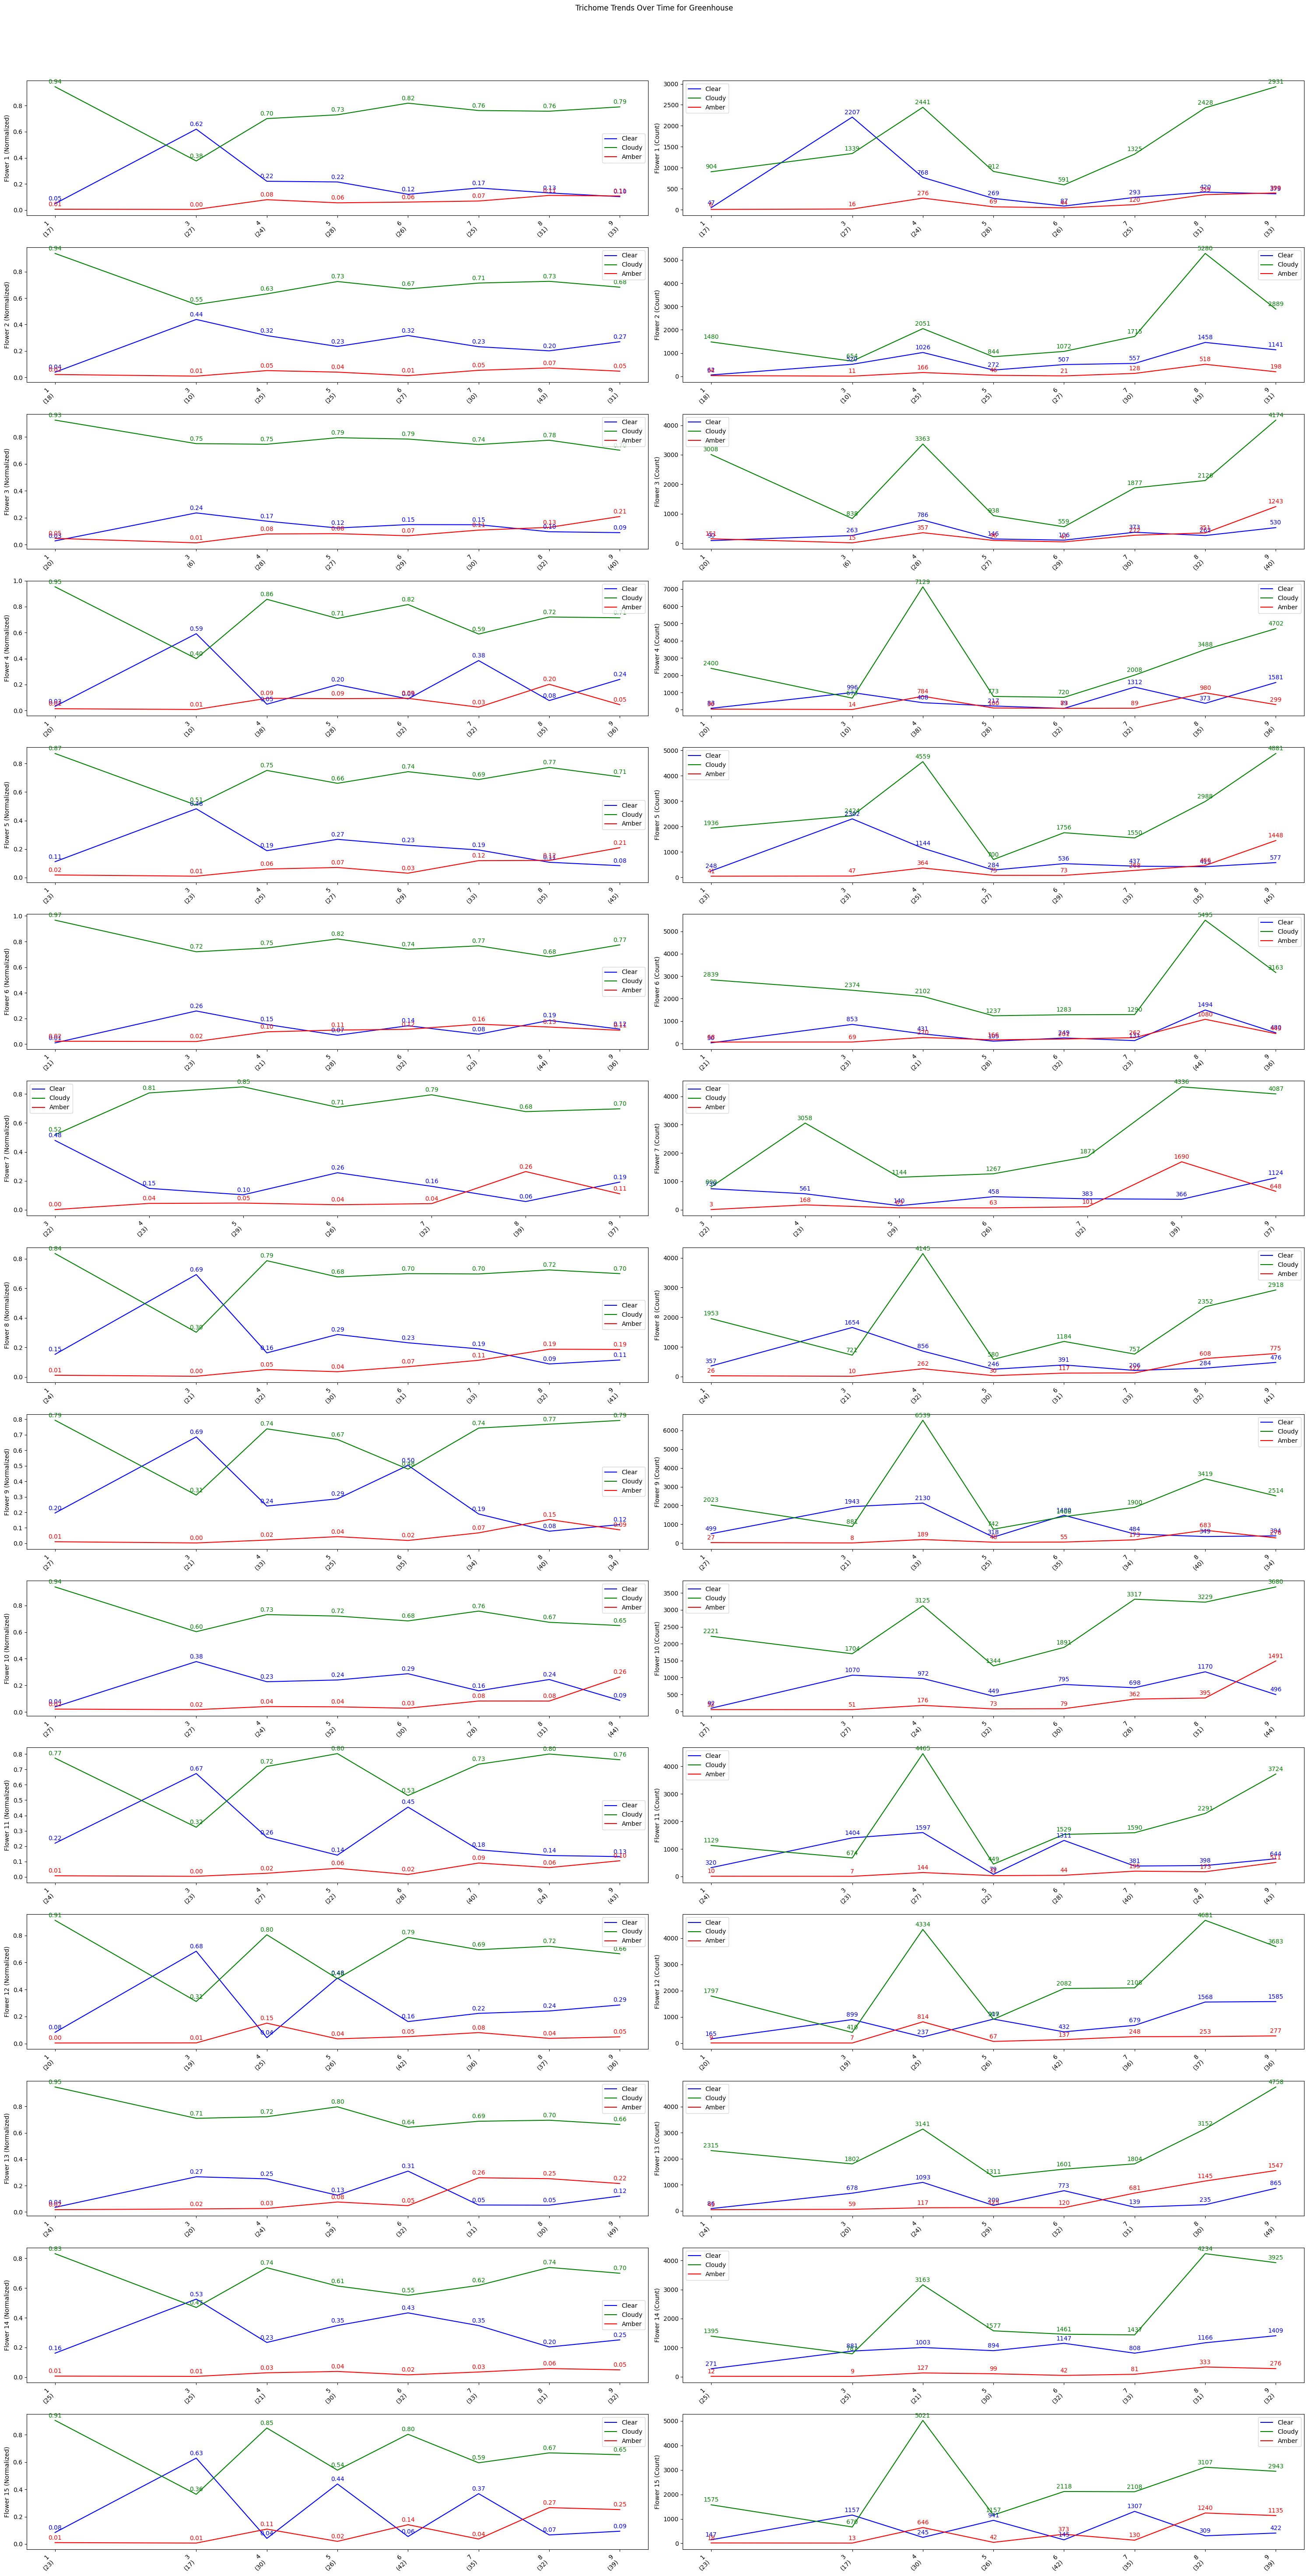

In [22]:
plot_combined_trends_subplots(df_greenhouse, 'Greenhouse')

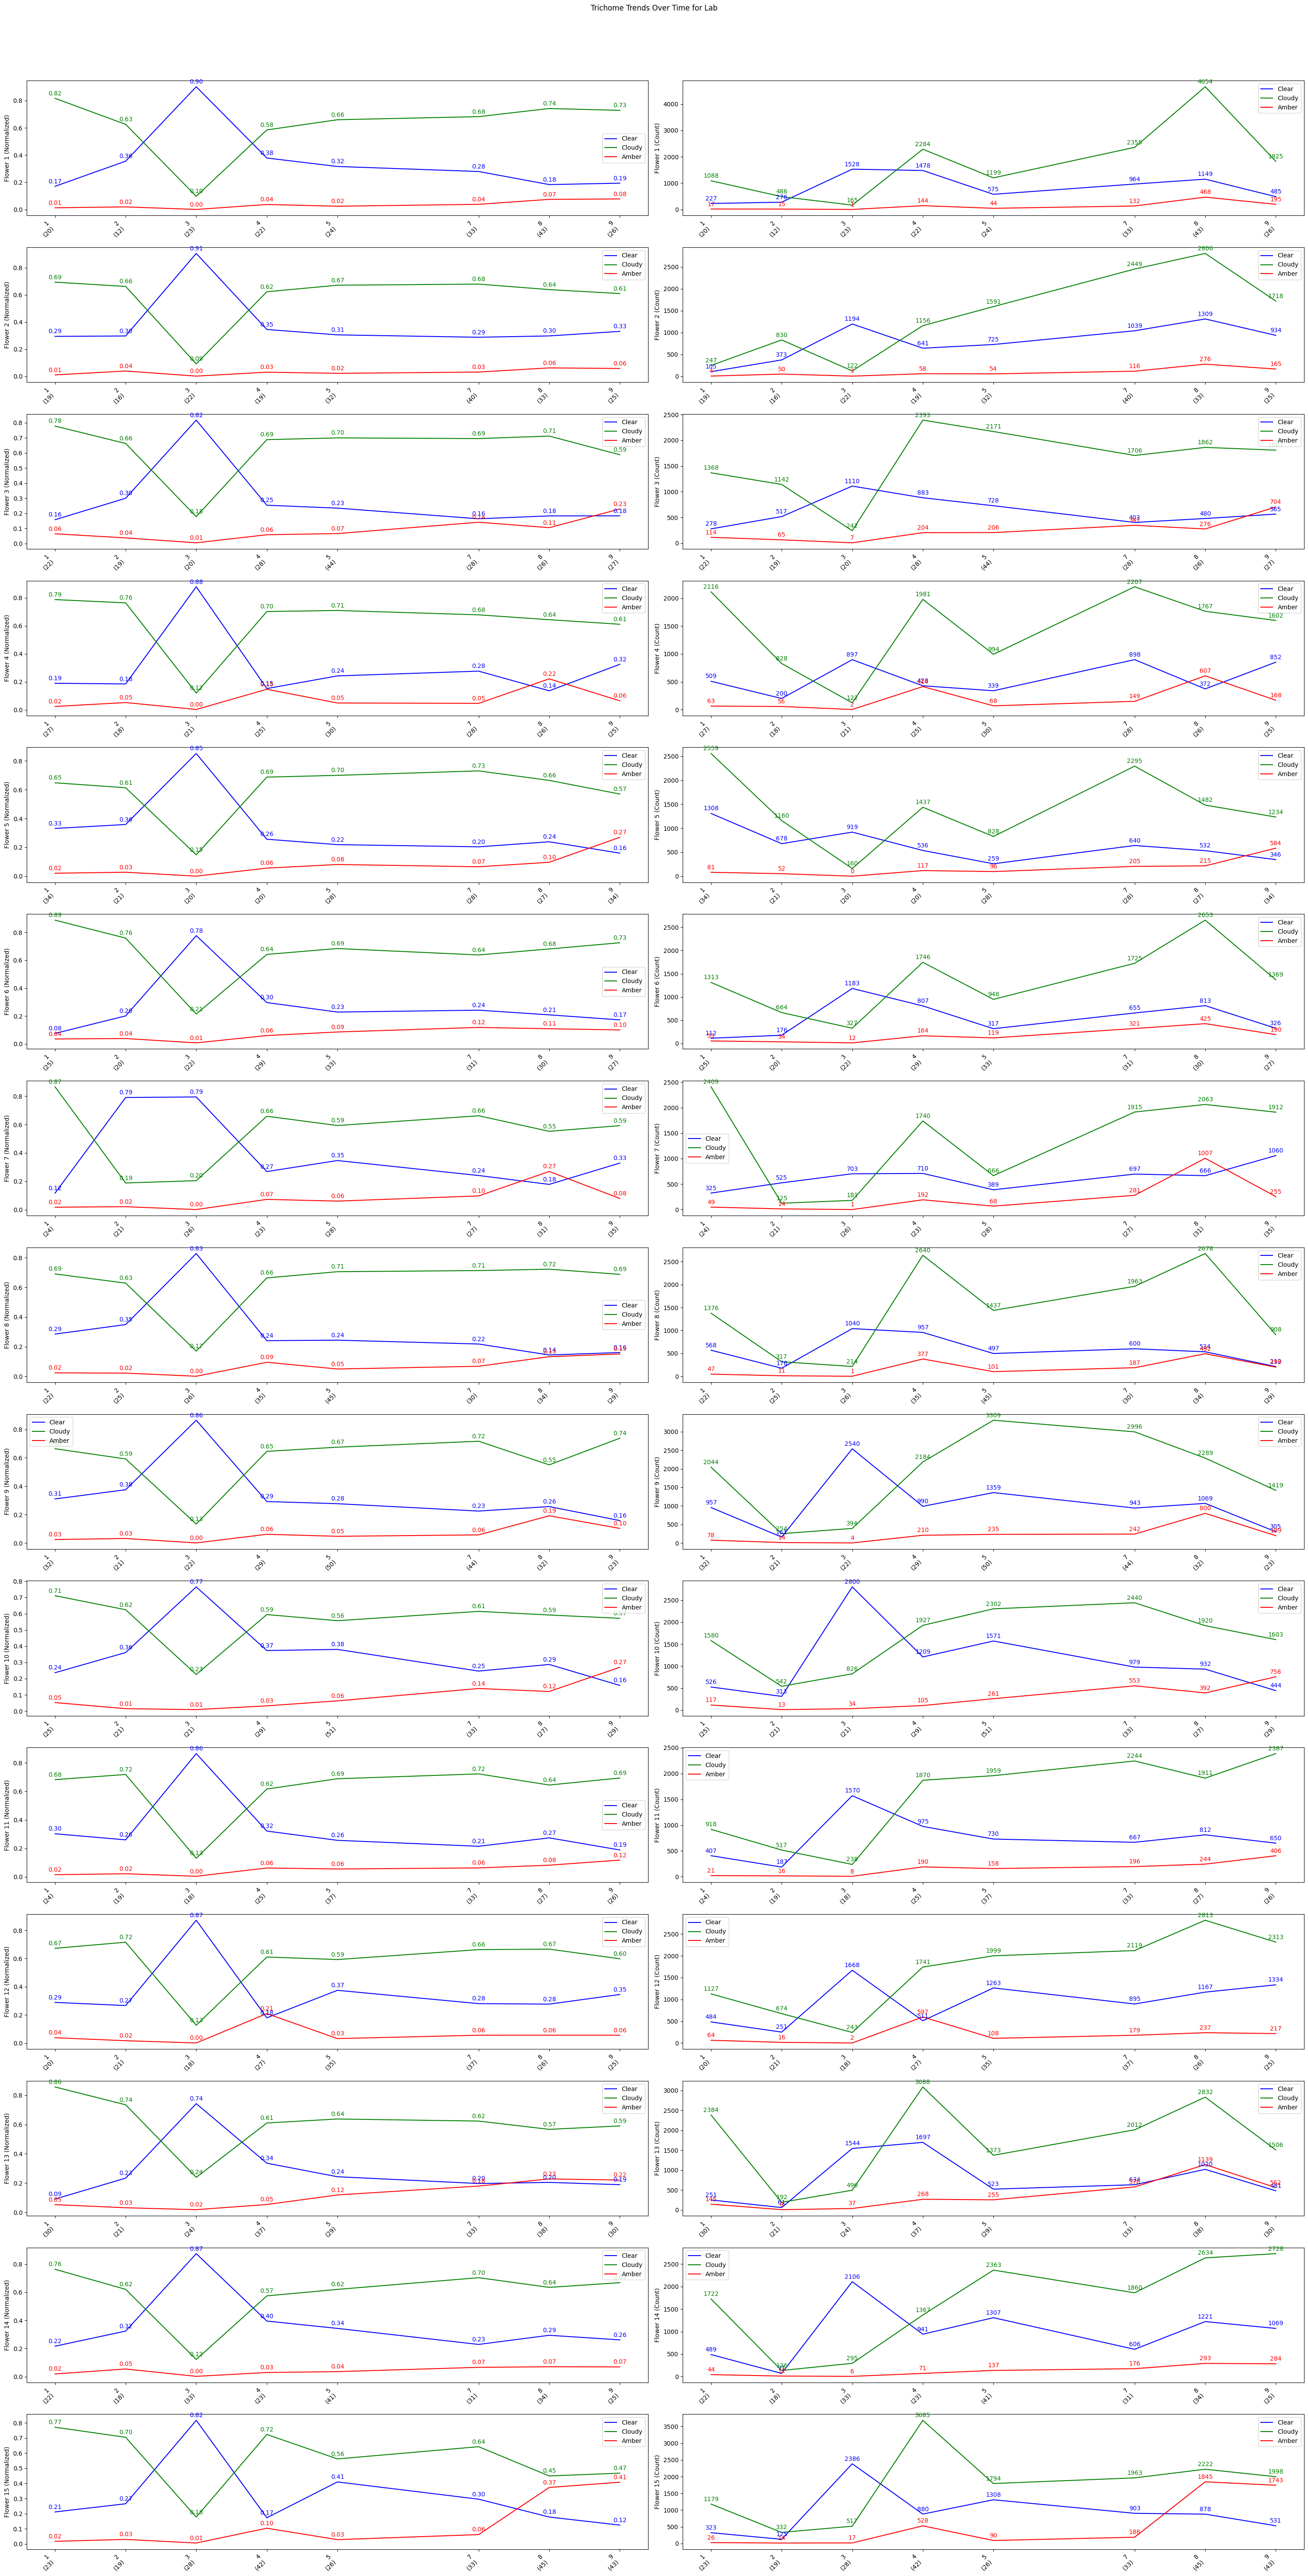

In [23]:
plot_combined_trends_subplots(df_lab, 'Lab')

## Correlation Matrix with all vars